In [9]:
import numpy as np
import matplotlib.pyplot as plt
import Prebreakdown
import Util
from scipy.special import j0, jn_zeros

In [10]:
r_max = 2e-3; z_max = 1e-3

V_bottom = Util.bessel_boundary(-500,1e-3)
V_top = Util.bessel_boundary(500,1e-3)
n_bottom = Util.gaussian_boundary(1e19,1e-4 / (np.sqrt(2*np.log(2)))) #HWHM of 1e-4

In [11]:
N_z = 160; N_r = 160
Dz = z_max / N_z; Dr = r_max / N_r

In [12]:
Dz

6.25e-06

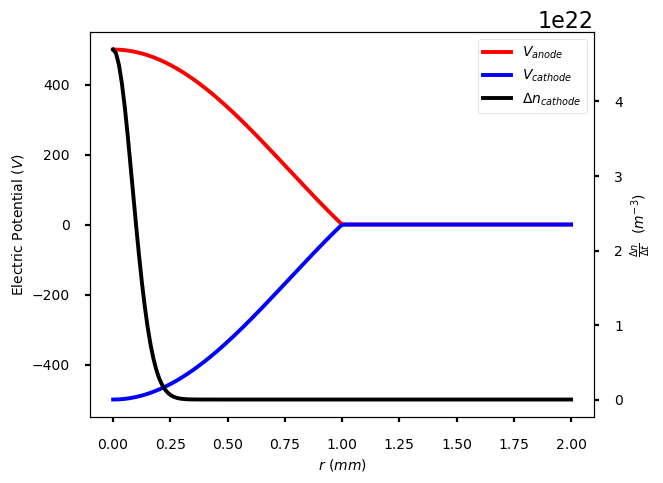

In [13]:
r = np.linspace(0,r_max,N_r)
plt.style.use('seaborn-v0_8-poster')

fig, ax1 = plt.subplots(figsize=(6.5,5))

ax2 = ax1.twinx()

line1, = ax1.plot(r*1e3, np.array([V_top(r_i,0) for r_i in r]), color='red', label=r'$V_{anode}$')
line2, = ax1.plot(r*1e3, np.array([V_bottom(r_i,0) for r_i in r]), color='blue',label=r'$V_{cathode}$')
line3, = ax2.plot(r*1e3, np.array([n_bottom(r_i,0) for r_i in r]), color='black',label=r'$\Delta n_{cathode}$')

ax1.tick_params(axis='both', which='major', labelsize=10)
ax2.tick_params(axis='both', which='major', labelsize=10)

ax1.legend([line1,line2,line3],[r'$V_{anode}$',r'$V_{cathode}$',r'$\Delta n_{cathode}$'],fontsize=10)

ax1.set_ylabel(r'Electric Potential $(V)$',fontsize=10)
ax2.set_ylabel(r'$\frac{\Delta n}{\Delta t}$  $(m^{-3})$',fontsize=10)
ax1.set_xlabel(r'$r$ $(mm)$',fontsize=10)

fig.savefig('Boundary_Conditions.jpg')

In [14]:
p = Prebreakdown.Prebreakdown(N_z,N_r,Dz,Dr,V_top=V_top,V_bottom=V_bottom,nu=1e10,
                              n_bottom=n_bottom,u_z_bottom=lambda r,t : 1e5,
                              save_dir='160x160_1e-4')

/Users/cphys/Desktop/l_keeley/Prebreakdown_Dynamics/Prebreakdown.py:98: RuntimeWarning: divide by zero encountered in divide
  s.c = (s.rr + s.dr / 2) / s.rr; s.d = (s.rr - s.dr / 2) / s.rr


In [ ]:
p.sor(sp_r=0.97,iterations=1000000,EPS=1e-13)

In [8]:
for _ in range(100):
    p.step(method='Fluid',smooth=True,smooth_sigma=1/2,save_every=1)

Error reduced by factor of 8.637091042373868e-12 in <built-in function iter> iterations
target_dt: 2.5e-10
Old dt: 1e-15, ratio: 250000.0
Time step limited to: 1.0500000000000001e-15 at time: 1.0500000000000001e-15
[**] Saving in 10x10e-4/time_1.0500000000000001e-15_s
Step took: 0.2882678508758545


/Users/cphys/Desktop/l_keeley/Prebreakdown_Dynamics/Prebreakdown.py:536: RuntimeWarning: divide by zero encountered in divide
  np.min(np.float64(1)/(np.sqrt((s.u_z/s.dz)**2 + (s.u_r/s.dr)**2))),


Error reduced by factor of 1.3088205144461329e-11 in <built-in function iter> iterations
target_dt: 2.5e-10
Old dt: 1.0500000000000001e-15, ratio: 238095.23809523808
Time step limited to: 1.1025e-15 at time: 2.1525e-15
[**] Saving in 10x10e-4/time_2.1525e-15_s
Step took: 0.26653194427490234
Error reduced by factor of 7.148749227547429e-12 in <built-in function iter> iterations
target_dt: 2.5e-10
Old dt: 1.1025e-15, ratio: 226757.36961451248
Time step limited to: 1.1576250000000001e-15 at time: 3.310125e-15
[**] Saving in 10x10e-4/time_3.310125e-15_s
Step took: 0.26847410202026367
Error reduced by factor of 1.4434772186786624e-11 in <built-in function iter> iterations
target_dt: 2.5e-10
Old dt: 1.1576250000000001e-15, ratio: 215959.399632869
Time step limited to: 1.2155062500000002e-15 at time: 4.52563125e-15
[**] Saving in 10x10e-4/time_4.52563125e-15_s
Step took: 0.2745180130004883
Error reduced by factor of 1.266475524146387e-11 in <built-in function iter> iterations
target_dt: 2.5e-